In [1]:
# load visualizing functions
import requests
url = 'https://raw.githubusercontent.com/yigitatesh/ml/main/plots.py'
r = requests.get(url)

with open('plots.py', 'w') as f:
    f.write(r.text)

In [2]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

from plots import plot_classifier, plot_decision_boundary # visualization functions

from sklearn.datasets import make_classification

## Create Data

In [6]:
# classification data
X, y = make_classification(n_samples=200, n_features=2, n_informative=2, n_redundant=0, random_state=0)

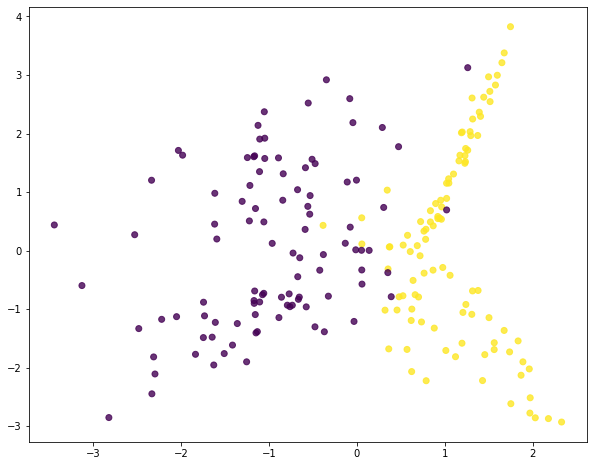

In [9]:
plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)

## Logistic Regression

Forward Propagation and Prediction:

$$
z = X.w + b \\
\hat{y} = \sigma(z) = \frac{1}{1 + e^{-z}} \\
predicted\,label = \left\{
                    \begin{array}\\
                        1 & \mbox{if} \,\ \hat{y} >= 0.5 \\
                        0 & \mbox{if} \,\ \hat{y} < 0.5 \\
                    \end{array}
                   \right.
\\
$$

Binary Cross Entropy Cost Function:

$$
Cost(\hat{y}, y) = \left\{
                    \begin{array}\\
                        -log(\hat{y}) & \mbox{if} \ y = 1 \\
                        -log(1 - \hat{y}) & \mbox{if} \ y = 0 \\
                    \end{array}
                   \right.
\\
$$

Combine Cost functions into one Cost function:

$$
Cost(\hat{y}, y) = -y.log(\hat{y}) - (1-y).log(1 - \hat{y})
\\
$$

Cost for All Data:
$$
Cost(\hat{y}, y) = \frac{1}{m}.\sum_{i=1}^{m}[-y.log(\hat{y}) - (1-y).log(1 - \hat{y})]
$$

Gradients (Chain Rule):

$$
\frac{dL}{dw} = \frac{dz}{dw}.\frac{da}{dz}.\frac{dL}{da}
$$

$$
\frac{dL}{db} = \frac{dz}{db}.\frac{da}{dz}.\frac{dL}{da}
\\
$$

Derivatives:
$$
\frac{dL}{da} = -\frac{y}{a} + \frac{1-y}{1-a}
$$

$$
\frac{da}{dz} = \sigma'(z) = \sigma(z).(1 - \sigma(z)) \\
= a.(1 - a) \\
$$

$$
\frac{dL}{dz} = a - y
\\
$$

$$
\frac{dz}{dw} = X
$$

$$
\frac{dz}{db} = 1
\\
$$

Final Gradients:

$$
\frac{dL}{dw} = X.(a - y)
$$

$$
\frac{dL}{db} = a - y
$$

&emsp;n = number of data samples <br>
&emsp;f = number of features each sample has <br>
<br>
Shapes: <br>
&emsp;X : (n, f) <br>
&emsp;y : (n, 1) <br>
&emsp;w : (f, 1) <br>
&emsp;b : (1)

In [ ]:
# Logistic Regression class
# class will be written



In [ ]:
# fit the model
lr = LogisticRegression().fit(X, y.reshape(-1, 1))

In [ ]:
# weights and bias
print(lr.w)
print(lr.b)

[[ 3.84657463]
 [-0.739231  ]] -0.03615229524900568


In [ ]:
# calculate score
lr.score(X, y.reshape(-1, 1))

0.935

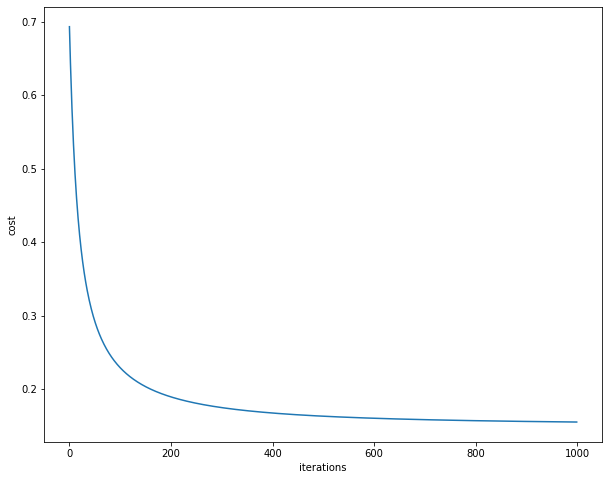

In [ ]:
# plot costs
plt.figure(figsize=(10, 8))
plt.xlabel("iterations")
plt.ylabel("cost")
plt.plot(range(len(lr.costs)), lr.costs)

In [ ]:
# plot decision boundary
plot_decision_boundary(lr, X, y)

In [1]:
# plot decision boundary
plot_classifier(lr, X, y)

## MSE vs Log loss

In [ ]:
# on jupyter notebook, uncomment below line
#%matplotlib notebook

In [ ]:
from matplotlib import cm
from matplotlib.ticker import LinearLocator

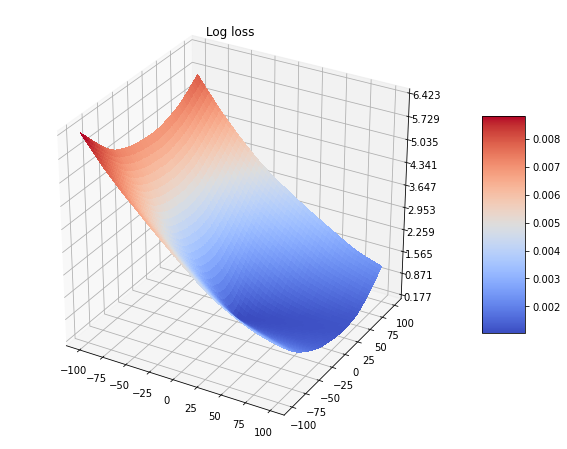

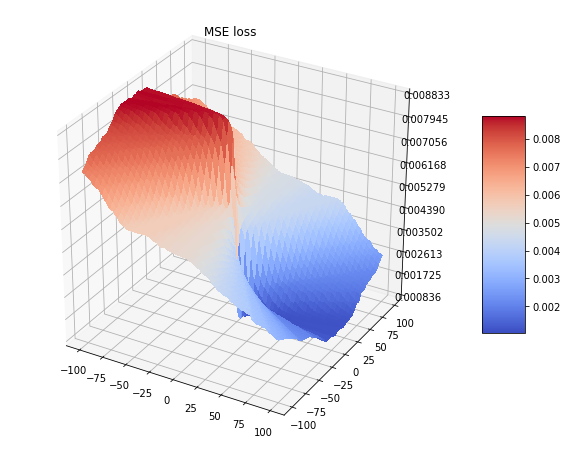

In [ ]:
fig1, ax1 = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(10, 8))
fig2, ax2 = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(10, 8))

# titles
ax1.set_title("Log loss")
ax2.set_title("MSE loss")

lr = LogisticRegression().fit(X, y.reshape(-1, 1))
y_2 = y / 10

# Make data.
l = 100
precision = 0.5
W1 = np.arange(-l, l, precision)
W2 = np.arange(-l, l, precision)
W1, W2 = np.meshgrid(W1, W2)
MSE = np.zeros_like(W1)
LOG = np.zeros_like(W1)
for i in range(W1.shape[0]):
    for j in range(W1.shape[1]):
        lr.w = np.array([W2[i][j], W1[i][j]])
        preds = lr.sigmoid(np.dot(X, lr.w) + lr.b) / 10
        MSE[i][j] = np.mean((y_2 - preds) ** 2)
        LOG[i][j] = np.mean(-y_2 * np.log(preds) - (1-y_2) * np.log(1-preds))

# Plot the surfaces.
surf = ax1.plot_surface(W1, W2, LOG, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

surf = ax2.plot_surface(W1, W2, MSE, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# set labels
ax1.set_xlabel("W1")
ax1.set_ylabel("W2")
ax1.set_zlabel("Cost")

ax2.set_xlabel("W1")
ax2.set_ylabel("W2")
ax2.set_zlabel("Cost")

# Customize the z axises.
ax1.zaxis.set_major_locator(LinearLocator(10))
ax2.zaxis.set_major_locator(LinearLocator(10))

# Add a color bar which maps values to colors.
fig1.colorbar(surf, shrink=0.5, aspect=5)
fig2.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

## Gender Prediction using Heights and Weights

In [3]:
# heights weights data
hw_df = pd.read_csv("https://raw.githubusercontent.com/yigitatesh/ml/main/datasets/weight-height.csv")
hw_df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [4]:
# get a random sample from data
sampled_df = hw_df.sample(1000, random_state=3)

In [5]:
# inputs and outputs
X = sampled_df[["Height", "Weight"]].values
y = sampled_df["Gender"].values

In [6]:
# label encoding -> 0: male, 1: female
y = np.where(y == "Male", 0, 1)

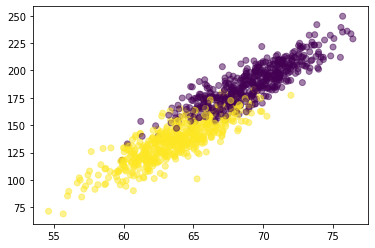

In [7]:
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.5)

In [9]:
# fit the model
lr = LogisticRegression(lr=0.00001).fit(X, y.reshape(-1, 1))

In [ ]:
# calculate score
lr.score(X, y.reshape(-1, 1))

0.935

In [ ]:
# plot decision boundary
plot_decision_boundary(lr, X, y)

## Logistic Regression with plotting

In [10]:
# Logistic Regression class
class LogisticRegression:
    def __init__(self, lr=0.001, max_iter=1000, threshold=0.5):
        self.max_iter = max_iter
        self.lr = lr
        self.threshold = threshold
    
    def fit(self, X, y):
        self.w = np.zeros((X.shape[1], 1))
        self.b = 0
        
        self.costs = []
        
        # learning
        for i in range(self.max_iter):
            # outputs
            z = np.dot(X, self.w) + self.b
            y_hat = self.sigmoid(z)
            
            # gradients
            d_z = y_hat - y
            
            d_w = np.dot(X.T, d_z) / len(self.w)
            d_b = (d_z).sum() / len(d_z)
            
            # gradient descent
            self.w -= self.lr * d_w
            self.b -= self.lr * d_b
            
            # cost
            cost = (- y * np.log(y_hat) - (1-y) * np.log(1 - y_hat)).mean()
            
            self.costs.append(cost)
            
            if i < 100 and i % 10 == 0:
                print("iteration: {}\nscore: {}".format(i, self.score(X, y)))
                
                plot_decision_boundary(self, X, y)
        
        return self
        
    def predict(self, X):
        z = np.dot(X, self.w) + self.b
        y_hat = self.sigmoid(z)
        return np.where(y_hat > self.threshold, 1, 0)
        
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def score(self, X, y):
        preds = self.predict(X)
        return (preds == y).mean()

iteration: 0
score: 0.49


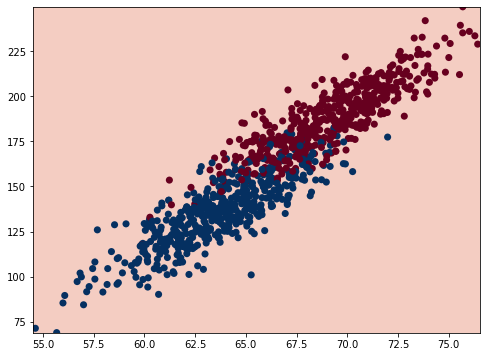

iteration: 10
score: 0.495


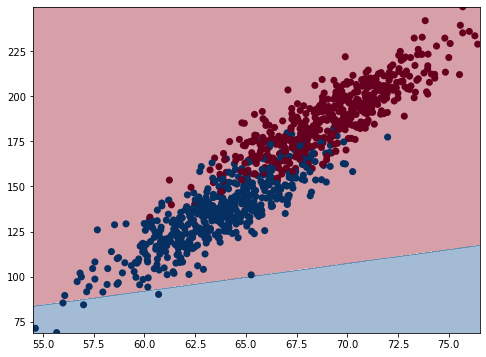

iteration: 20
score: 0.614


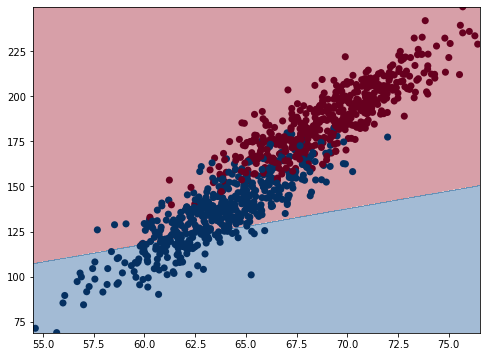

iteration: 30
score: 0.732


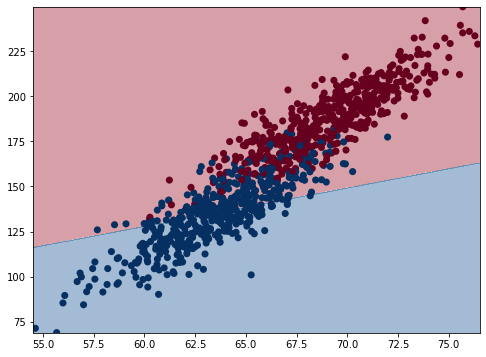

iteration: 40
score: 0.823


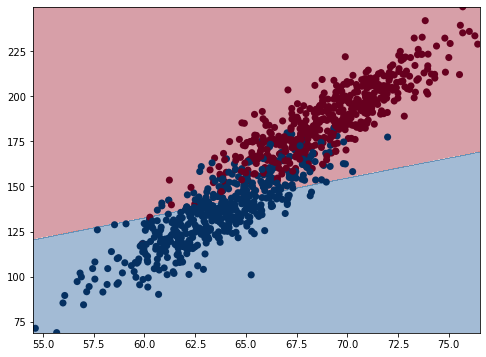

iteration: 50
score: 0.855


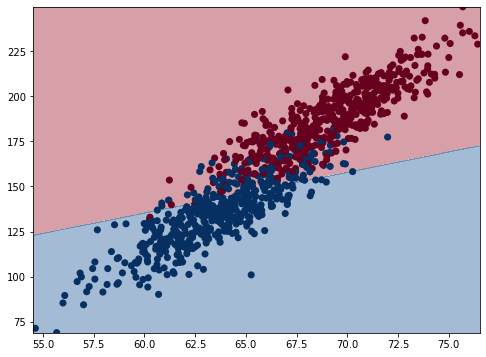

iteration: 60
score: 0.874


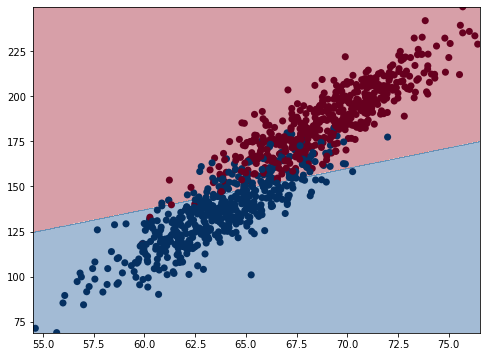

iteration: 70
score: 0.887


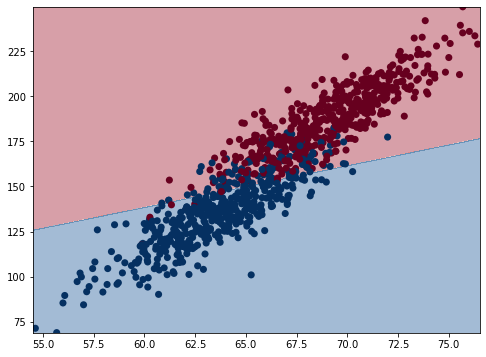

iteration: 80
score: 0.895


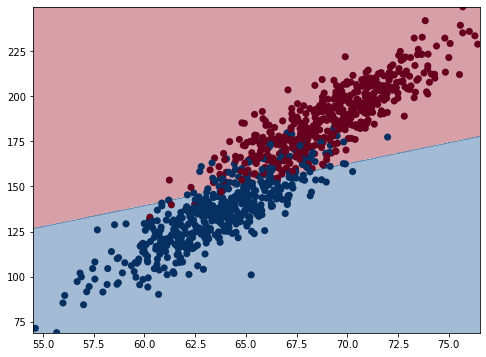

iteration: 90
score: 0.907


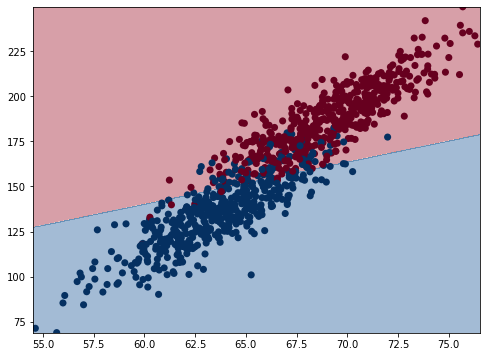

In [11]:
# fit and plot
lr = LogisticRegression(lr=0.0000005).fit(X, y.reshape(-1, 1))

# Mail Spam Detection

In [162]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split 
from sklearn.metrics import roc_auc_score

from sklearn.linear_model import LogisticRegression

In [84]:
url = "https://raw.githubusercontent.com/yigitatesh/ml/main/datasets/spam.csv"

In [85]:
# read mails dataset
df = pd.read_csv(url)
df.head()

,text,target
0,"Go until jurong point, crazy.. Available only ...",ham
1,Ok lar... Joking wif u oni...,ham
2,Free entry in 2 a wkly comp to win FA Cup fina...,spam
3,U dun say so early hor... U c already then say...,ham
4,"Nah I don't think he goes to usf, he lives aro...",ham


In [ ]:
# a mail
df["text"][0]

### How does CountVectorizer work ?

In [118]:
# vectorize a list of sentences
txt = ["I am a student.",
       "are you a student ?"]

cv = CountVectorizer()
txt_vec = cv.fit_transform(txt)

In [119]:
# show vector and words
columns = [None] * len(cv.vocabulary_)
for word, index in cv.vocabulary_.items():
    columns[index] = word

txt_df = pd.DataFrame(txt_vec.toarray(), columns=columns)
txt_df

,am,are,student,you
0,1,0,1,0
1,0,1,1,1


## Getting insights of Data

### Spam and Ham mails

In [86]:
# ham mail examples
df.loc[df["target"] == "ham"]["text"].iloc[0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [87]:
# spam mail examples
df.loc[df["target"] == "spam"]["text"].iloc[0]

"Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"

### Most Used Words in Spam Mails

In [88]:
# concatenate all spam mails
spam_all = " ".join(list(df.loc[df["target"] == "spam"]["text"].values))
spam_all

'Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C\'s apply 08452810075over18\'s FreeMsg Hey there darling it\'s been 3 week\'s now and no word back! I\'d like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv WINNER!! As a valued network customer you have been selected to receivea å£900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only. Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with camera for Free! Call The Mobile Update Co FREE on 08002986030 SIX chances to win CASH! From 100 to 20,000 pounds txt> CSH11 and send to 87575. Cost 150p/day, 6days, 16+ TsandCs apply Reply HL 4 info URGENT! You have won a 1 week FREE membership in our å£100,000 Prize Jackpot! Txt the word: CLAIM to No: 81010 T&C www.dbuk.net LCCLTD POBOX 4403LDNW1A7RW18 XXXMobileMovieClub: To use your credit, click the WAP link in the next txt messag

In [89]:
# convert words into a count vector
cv = CountVectorizer(stop_words="english")
#stop words: {the, and, I, ...}

spam_vec = cv.fit_transform([spam_all])

In [90]:
spam_vec

<1x2699 sparse matrix of type '<class 'numpy.int64'>'
	with 2699 stored elements in Compressed Sparse Row format>

In [75]:
# words and their indexes in vector
cv.vocabulary_

{'free': 1315,
 'entry': 1225,
 'wkly': 2640,
 'comp': 1047,
 'win': 2626,
 'fa': 1253,
 'cup': 1106,
 'final': 1281,
 'tkts': 2423,
 '21st': 385,
 '2005': 376,
 'text': 2389,
 '87121': 672,
 'receive': 2056,
 'question': 2025,
 'std': 2293,
 'txt': 2480,
 'rate': 2037,
 'apply': 779,
 '08452810075over18': 75,
 'freemsg': 1319,
 'hey': 1422,
 'darling': 1121,
 'week': 2610,
 'word': 2647,
 'like': 1593,
 'fun': 1327,
 'tb': 2370,
 'ok': 1857,
 'xxx': 2668,
 'chgs': 996,
 'send': 2177,
 '50': 530,
 'rcv': 2042,
 'winner': 2630,
 'valued': 2537,
 'network': 1808,
 'customer': 1111,
 'selected': 2173,
 'receivea': 2057,
 '900': 701,
 'prize': 1998,
 'reward': 2111,
 'claim': 1009,
 '09061701461': 222,
 'code': 1032,
 'kl341': 1552,
 'valid': 2535,
 '12': 316,
 'hours': 1452,
 'mobile': 1739,
 '11': 308,
 'months': 1757,
 'entitled': 1224,
 'update': 2515,
 'latest': 1573,
 'colour': 1039,
 'mobiles': 1740,
 'camera': 950,
 '08002986030': 59,
 'chances': 976,
 'cash': 961,
 '100': 295,
 '2

In [80]:
# get words and their counts
word_counts = spam_vec.toarray()[0]
count_dict = {}

for word in cv.vocabulary_:
    count_dict[word] = word_counts[cv.vocabulary_[word]]
    
# word counts sorted by their counts
sorted_counts = sorted(count_dict.items(), key=lambda x: x[1], reverse=True)
sorted_counts

[('free', 224),
 ('txt', 163),
 ('ur', 144),
 ('mobile', 127),
 ('text', 125),
 ('stop', 121),
 ('claim', 113),
 ('reply', 104),
 ('www', 98),
 ('prize', 93),
 ('just', 78),
 ('cash', 76),
 ('won', 76),
 ('uk', 74),
 ('150p', 71),
 ('send', 70),
 ('new', 69),
 ('nokia', 67),
 ('win', 64),
 ('urgent', 63),
 ('week', 60),
 ('tone', 60),
 ('50', 57),
 ('service', 56),
 ('contact', 56),
 ('com', 54),
 ('msg', 54),
 ('16', 51),
 ('18', 51),
 ('guaranteed', 50),
 ('customer', 49),
 ('phone', 45),
 ('chat', 44),
 ('500', 44),
 ('cs', 44),
 ('min', 43),
 ('1000', 41),
 ('100', 40),
 ('draw', 39),
 ('awarded', 38),
 ('latest', 36),
 ('sms', 36),
 ('mins', 36),
 ('camera', 35),
 ('line', 35),
 ('message', 34),
 ('150ppm', 34),
 ('receive', 33),
 ('holiday', 32),
 ('landline', 32),
 ('video', 32),
 ('wk', 32),
 ('ringtone', 31),
 ('shows', 31),
 ('rate', 30),
 ('apply', 30),
 ('code', 30),
 ('want', 30),
 ('box', 30),
 ('number', 30),
 ('000', 29),
 ('live', 29),
 ('po', 29),
 ('award', 28),
 ('1

### Digit Counts of ham and spam mails

In [120]:
spam_digit_count = df.loc[df["target"] == "spam"]["text"].apply(lambda x: len([1 for i in x if i.isdigit()])).mean()
ham_digit_count = df.loc[df["target"] == "ham"]["text"].apply(lambda x: len([1 for i in x if i.isdigit()])).mean()
print("ham : {}".format(ham_digit_count))
print("spam: {}".format(spam_digit_count))

ham : 0.2992746113989637
spam: 15.759036144578314


# Fit Logistic Regression

## Label Encoding of targets

In [124]:
# ham = 0, spam = 1
target_dict = {0: "ham", 1: "spam"}
df["target"] = np.where(df["target"] == "ham", 0, 1)
df.head()

,text,target
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


## Train and Test Data

In [125]:
X = df.iloc[:, 0]
y = df.iloc[:, 1]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

## Count Vectorize

In [128]:
# vectorizer
cv = CountVectorizer(stop_words="english")

X_train_vec = cv.fit_transform(X_train).toarray()
X_test_vec = cv.transform(X_test).toarray()

In [130]:
pd.DataFrame(X_train_vec)

,0,1,2,3,4,5,6,7,8,9,...,7223,7224,7225,7226,7227,7228,7229,7230,7231,7232
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4174,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4175,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4176,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4177,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [194]:
# fit logistic regression
lr = LogisticRegression(C=1000, max_iter=1000).fit(X_train_vec, y_train.values)

In [196]:
# calculate score
preds = lr.predict(X_test_vec)
roc_auc_score(y_test, preds)

0.9611111111111111